# **Y-Scrambling for Modeling of Solubility Dataset**

Watch the [**YouTube video**](https://youtu.be/gKCDSiRRyUo) accompanying this Jupyter notebook

*Y column is scrambled, shuffled or permutated. In plain English: "change the order of".*

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [ ]:
import pandas as pd

In [ ]:
delaney_with_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Y-Scrambling

In [ ]:
# Data set
X = dataset.drop(['logS'], axis=1)
Y = dataset.iloc[:,-1]

In [ ]:
Y.sample(frac=1, replace=False, random_state=0)

# Original vs Y-scrambled model

### Model from original X-Y pairs

In [ ]:
# Model from original X-Y pairs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data set
X = dataset.drop(['logS'], axis=1)
Y = dataset.iloc[:,-1]
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Y-Shuffling

# Model building
model = LinearRegression()
model.fit(X_train, Y_train)
# Make prediction
Y_train_pred = model.predict(X_train)
# Compute R2 score
r2a = r2_score(Y_train, Y_train_pred)
# Print R2 score
r2a

0.7692295963594564

Text(0.5, 0, 'Experimental LogS')

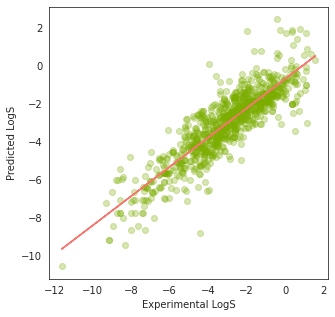

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')


### Build Y-scrambled models

In [ ]:
# Build Y-scrambled models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_train_list = []

# Data set
X = dataset.drop(['logS'], axis=1)
Y = dataset.iloc[:,-1]
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for i in range(1000):
  # Y-Shuffling
  Y_train = Y_train.sample(frac=1, replace=False, random_state=i)
  # Model building
  model = LinearRegression()
  model.fit(X_train, Y_train)
  # Make prediction
  Y_train_pred = model.predict(X_train)
  # Compute R2 score
  r2b = r2_score(Y_train, Y_train_pred)
  r2_train_list.append(r2b)
# Print R2 score
r2_train_list

[0.005000466583799712,
 0.0007344012911356668,
 0.0015350025013735058,
 0.008489665717226091,
 0.003915607299682988,
 0.004548790428902105,
 0.0008429663446728464,
 0.001615778039415705,
 0.006630020361143352,
 0.001819193577353495,
 0.003317010494101269,
 0.0018133191135055737,
 0.0030177365815898805,
 0.002978056982963273,
 0.0032133843178231425,
 0.007567690178066466,
 0.01087936035200976,
 0.008827238527726822,
 0.004009406151912254,
 0.0025264174317727317,
 0.00024635037369347135,
 0.0038096144515310515,
 0.0021811896733753278,
 0.003952612637298625,
 0.0007547520675049713,
 0.0026415819692209297,
 0.004859929867937374,
 0.005013421614001201,
 0.003921301914299069,
 0.008410582384709042,
 0.0031573997486421534,
 0.0006141583859642363,
 0.0037322043369546476,
 0.0014226823214904538,
 0.002413831601759009,
 0.0036567985620454824,
 0.005270657997406225,
 0.0045796381916292095,
 0.00498831882527051,
 0.010597172477750827,
 0.00871373552960275,
 0.003948403001362344,
 0.002950385888369

[(0.0, 1.0)]

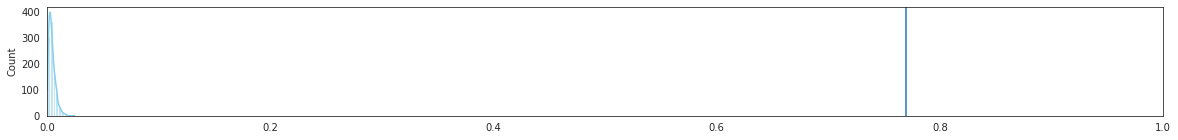

In [ ]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 2)) 

ax = sns.histplot(data=r2_train_list, color="skyblue", kde=True, bins = 10)
plt.axvline(r2a)
ax.set(xlim=(0, 1))